In [ ]:
import pandas as pd
import numpy as np
import requests
import json
import logging
import io
import matplotlib.pyplot as plt

In [1]:

# Configure logging
logging.basicConfig(filename='question_9_log.txt', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


# Requesting content from the URL with GET method
response = requests.get('https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD')

# Check if the request was successful
if response.status_code == 200:
    # Wrap the response content in a BytesIO object
    content = io.BytesIO(response.content)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(content)


else:
    logging.info('Request was not successful. Status code:', response.status_code)

# # Save the DataFrame as an Excel file
df.to_excel('structured_dataset.xlsx', index=False)
logging.info("Structured dataset has been saved as structured_dataset.xlsx.")

In [6]:
# Task 1: Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_qualifying_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible']
non_qualifying_cars = non_qualifying_cars[['Make', 'Model', 'Electric Vehicle Type']]
print("Non-Qualifying Cars:")
print(len(non_qualifying_cars))

Non-Qualifying Cars:
69892


In [8]:
# Task 2: Get all TESLA cars with the model year, and model type made in Bothell City.
tesla_bothell = df[(df['Make'] == 'TESLA') & (df['City'] == 'Bothell')]
tesla_bothell = tesla_bothell[['Make', 'Model Year', 'Model']]
print("\nTESLA Cars made in Bothell City:")
tesla_bothell


TESLA Cars made in Bothell City:


array([2020, 2022, 2018, 2017, 2021, 2023, 2015, 2019, 2016, 2014, 2013,
       2012])

In [ ]:
# Task 3: Get all the cars that have an electric range of more than 100, and were made after 2015
cars_high_range = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)]
print("\nCars with Electric Range > 100 and made after 2015:")
print(cars_high_range)

In [13]:
# Task 4: Draw plots to show the distribution between city and electric vehicle type

city_ev_type_counts = df.groupby(['City', 'Electric Vehicle Type']).size().unstack(fill_value=0)
city_ev_type_counts

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
City,,
Aberdeen,73,42
Acme,3,4
Addy,1,1
Aiea,0,1
Airway Heights,10,8
...,...,...
Yacolt,19,13
Yakima,309,162
Yarrow Point,102,24


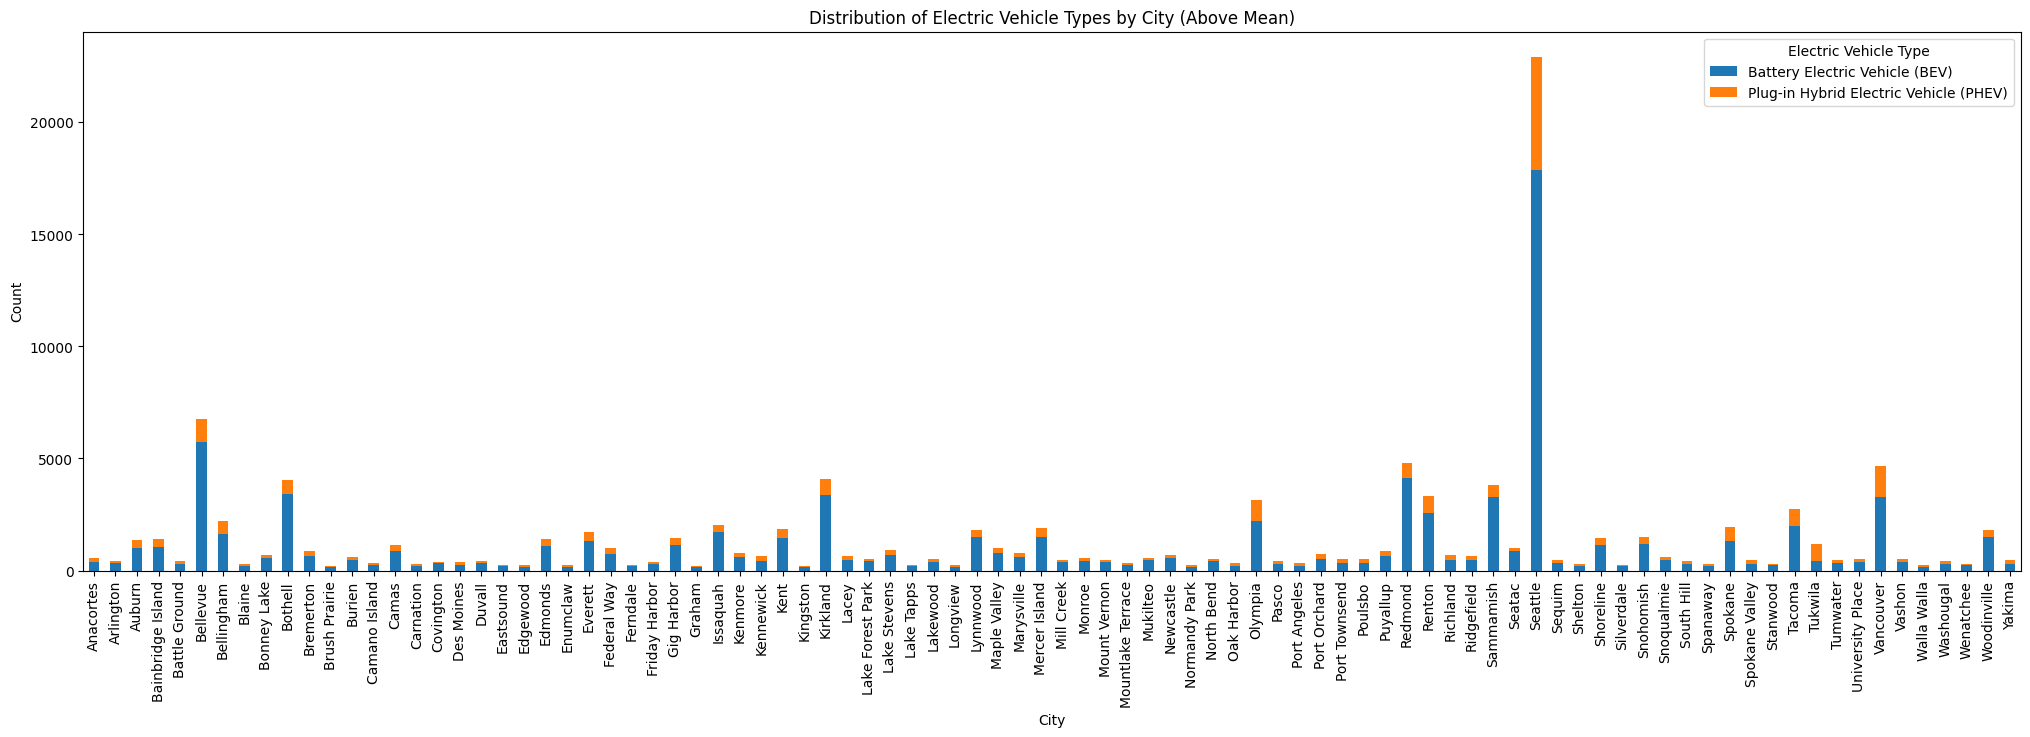

In [11]:
# Task 4: Draw plots to show the distribution between city and electric vehicle type


city_ev_type_counts = df.groupby(['City', 'Electric Vehicle Type']).size().unstack(fill_value=0)
# Calculate the mean count
mean_count = city_ev_type_counts.mean()

# Filter the city_ev_type_counts DataFrame to include only rows with counts above the mean
filtered_counts = city_ev_type_counts[city_ev_type_counts > mean_count].dropna()

# Plot the filtered counts
filtered_counts.plot(kind='bar', stacked=True, figsize=(25, 7))
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by City (Above Mean)')
plt.legend(title='Electric Vehicle Type')
plt.show()